This Sentiment Analysis project is done by:

Gizem Aydın - 21034  /Aynur Süne - 21041 / Bugra Kaya - 21159   / Barkan Var - 21067


##**Reading the Data**

The data is read  from a file inside the drive into a Pandas DataFrame. Each row contains a sentence and the label of the sentence, whether it is positive or negative.

In [0]:
#Get the lines from the file
yelp_file = open('yelp_labelled.txt', 'r')
yelp_lines = yelp_file.readlines()
yelp_file.close()

In [0]:
#Construct the DataFrame
import pandas as pd
yelp = pd.DataFrame(data=None, index=None, columns=['Sentence','Value'], dtype=None, copy=False)

In [0]:
#Convert each line to an appropriate row
for line in yelp_lines:
  values = line.split("\t")
  row = pd.Series([values[0],values[1][:1]],index=['Sentence', 'Value'])
  yelp = yelp.append(row, ignore_index = True)
  
 

In [0]:
#Head of the DF
yelp.head()

,Sentence,Value
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [0]:
#Divide train and validation data
from sklearn.model_selection import train_test_split

X = yelp.drop(['Value'],axis=1)
Y = yelp['Value']

x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=1)

## **Data Preprocessing**

We have to transform our data to a format eligible for analysing. 


1.   Case Conversion: Convert every letter to lowercase.
2.   Remove Punctuation
3.   Remove Stop Words: Removes the commonly used words which has no sentimental meaning like a, an, the.
4.   Lemmatization: Deals with removal of inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
5.   Spelling Correction
6.   Part of Speech Tagging: Classify and tag each word as verb, noun, etc.
7.   Remove Numbers

Below, these are implemented as functions, and there is the myDataProcessing() function which performs all operations mentioned above.



In [0]:
#Import, install and download the necessary libraries.
!pip install pyspellchecker 

import nltk
from nltk.corpus import stopwords
from spellchecker import SpellChecker
import string

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
#Get the list of stop words from NLTK
stopWords = set(stopwords.words('english'))

In [0]:
#Let us see if the word 'also' is a member of stop words
"also" in stopWords 

False

In [0]:
#Input: Lowercase string without punctuation
#Output: Array of words
#Deletes the stopwords except "not". 'Not' is essentially one of the stop words in our corpus. However, we believe that it has an importance on deciding the content of a comment.
def RSW(myString):
  stringArray = myString.split()
  newArray = []
  for word in stringArray:
    if word not in stopWords or word == "not":
      newArray.append(word)
  return newArray

In [0]:
#Input: Array of words
#Output: Array of words
#Corrects the misspelled words
def mySpellChecker(stringArray):
  spell = SpellChecker()
  newArray = []
  for word in stringArray:
    misspelled = spell.unknown(word)
    if not misspelled:
      newArray.append(word)
    else:
      newArray.append(spell.correction(word))
      
  return newArray

In [0]:
#Input: Lowercase string without punctuation
#Output: Array of words
#Removes the stop words, checks the spelling, corrects if necessary, lemmatizes.
def RSWandSCandLM(myString):
  spell = SpellChecker()
  wordnet_lemmatizer = nltk.WordNetLemmatizer()
  stringArray = myString.split()
  newArray = []
  for word in stringArray:
    if word not in stopWords or word == "not":
      misspelled = spell.unknown(word)
      if not misspelled:
        newArray.append(wordnet_lemmatizer.lemmatize(word))
      else:
        wordCorrected = spell.correction(word)
        newArray.append(wordnet_lemmatizer.lemmatize(wordCorrected))
  return newArray



In [0]:
#Prequisite: Function RSWandSCandLM()
#Input: DataFrame storing the sentence in column "Sentence"
#Output: DataFrame
#This is the final preprocession function: lowercase+ strip punctuation+spellcheck+remove stop words+lemmatize+add part of speech tags+remove numbers
#tags: https://www.nltk.org/book/ch05.html
def myDataPreprocessing(myDataFrame):
  translator = str.maketrans('', '', string.punctuation)
  translator2 = str.maketrans(string.ascii_letters, string.ascii_letters, string.digits)
  wordnet_lemmatizer = nltk.WordNetLemmatizer()
  
  myDataFrame['POStags'] = [None] * myDataFrame.shape[0]

  for index, row in myDataFrame.iterrows():
    row.Sentence = row.Sentence.lower()
    row.Sentence = row.Sentence.translate(translator)
    row.Sentence = row.Sentence.translate(translator2)
    row.Sentence = RSWandSCandLM(row.Sentence)
    row.POStags = nltk.pos_tag(row.Sentence)


In [0]:
#Apply preprocessing
myDataPreprocessing(x_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#Show head of data
x_train.head()

,Sentence,POStags
382,"[service, outshining, definitely, recommend, h...","[(service, NN), (outshining, VBG), (definitely..."
994,"[cant, tell, disappointed]","[(cant, NN), (tell, NN), (disappointed, VBD)]"
982,"[food, average]","[(food, NN), (average, NN)]"
47,"[burger, good, beef, cooked, right]","[(burger, NN), (good, JJ), (beef, NN), (cooked..."
521,"[havent, gone, go]","[(havent, NN), (gone, VBN), (go, VB)]"


**Sentiment techniques can be classified into 2:**


---


*a)Lexicon Based Approach*

It is based on finding the opinion lexicon for calculating the sentiment for a given text.  It deals with counting the number of positive and negative words in the text. If the text consists of more positive words, the text is assigned a positive score. If there are more number of negative words the text is assigned a negative score. If the text contains equal number of positive and negative words then it is assigned a neutral score. To determine whether a word is positive or negative an opinion lexicon (positive and negative opinion words) is built. We used *'sentiword'* as our corpus. We developed some rule-based approaches particular for this dataset. 

b) *Machine Learning Approach *

Here, two sets of documents are needed: training and a test set. A supervised learning classifier uses the training set to learn and train itself with respect to the differentiating attributes of text, and the performance of the classifier is tested using test dataset. Several machine learning algorithms are used for classification of text.


For Reference: (Anuja P Jain ; Padma Dandannavar, Application of Machine Learning Techniques to Sentiment Analysis  ) https://ieeexplore.ieee.org/document/7912076



## **Lexicon Based Approach**

In [0]:
from nltk.corpus import sentiwordnet as swn
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as ms
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from spellchecker import SpellChecker
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
nltk.download('sentiwordnet')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
def penn_to_wn(tag):

    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('IN'):
        return "i"
    return None

def swn_polarity(text): #a rule based function for extracting the polarity of the words

    sentiment = 0.0
    tokens_count = 0

    text = text.replace("n't", " not") #converts acronyms to 'not'
    text = text.replace("/", " ") 
    text = text.replace("as well", "")
    text = text.replace("at best", "atbest")
    raw_sentences = sent_tokenize(text)
    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence.lower()))
        arr = []
        for i in tagged_sentence:
            if len(RSW(i[0])) != 0:
                arr.append(i)
        tagged_sentence = arr
 
        for word, tag in tagged_sentence:
            if word.isdigit(): continue
            
            wn_tag = penn_to_wn(tag)
            if word in dictionary:
#                 print(word,sentiment)
                sentiment += dictionary[word]
             
            elif (wn_tag == 'v' and word[-3:] == "ing" and len(wn.synsets(word)) != 0 ): 
                i = 0
                found = 0
                lst = wn.synsets(word)
                while i < len(lst) and found == 0:
                    if word in lst[i].name() and ".s." in lst[i].name():
                        swn_synset = swn.senti_synset(lst[i].name())
                        found = 1
                    else:
                        i += 1
                if found == 0 and lst != []: #if the equivalent of the word is not found in sentiword
                    synset = lst[0]
                    swn_synset = swn.senti_synset(synset.name())
                    arr = []
                    tot = 0
                    for i in lst:
                        synset = swn.senti_synset(i.name())
                        tot += synset.pos_score() - synset.neg_score()
                    tot = tot / len(wn.synsets(word))
#                     print(word,sentiment)  
                    sentiment += tot
                    continue
#                 print(word,sentiment)   
                sentiment += swn_synset.pos_score() - swn_synset.neg_score()
                
                tokens_count += 1
            
            elif wn_tag == 'i' : continue
            
            else: 
                # if the word is not a verb
                if len(wn.synsets(word)) == 0: 
                    continue   
                    
                #Here, we find the averages of each word's positive and negative scores in order to get a better result 
                arr = []
                tot = 0
                for i in wn.synsets(word):
                    synset = swn.senti_synset(i.name())
                    tot += synset.pos_score() - synset.neg_score()
                tot = tot / len(wn.synsets(word))
#                 print(word,tot)
#                 print(word,sentiment)
                sentiment += tot
                
                tokens_count += 1
 
    # judgment call ? Default to positive or negative
    if not tokens_count:
        return 0
 
    # sum greater than 0 => positive sentiment
    if sentiment >= 0:
        return 1
 
    # negative sentiment
    return 0

In [0]:
dictionary = {
        "else" : -0.75,
        "better" : -0.5,
        "generous": 0.4,
        "other": -0.5,
        "others": -0.5,
        "another": -0.4,
        "blah": -0.5,
        "vegetarian": 0,
        "atbest": -0.5,
        "time": 0,
        "rubber": -0.2,
        "tasteless": -0.3
    }

In [0]:
#Predict on validation set
preds_lex = []
for row in x_valid['Sentence']:
    preds = swn_polarity(row)
    preds_lex.append(preds)

**A Small Visualization Using Wordcloud**

A Wordcloud (or Tag cloud) is a visual representation of text data. It displays a list of words, the importance of each beeing shown with font size or color. This format is useful for quickly perceiving the most prominent terms.

We wanted to add this figure to make our project more lively. We recognized some words like 'amazing, good, nice, wonderful' in positive labeled sentences and 'disappointed, terrible, won't' for negative labelled sentences. Thus, it gave us an initial understanding before going on with training and testing our data.

## **Feature Extraction**

Positive words


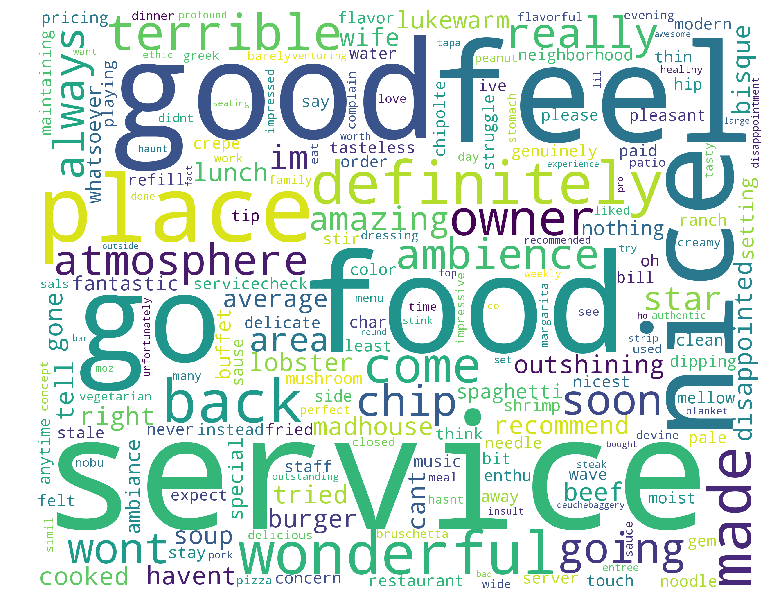

Negative words


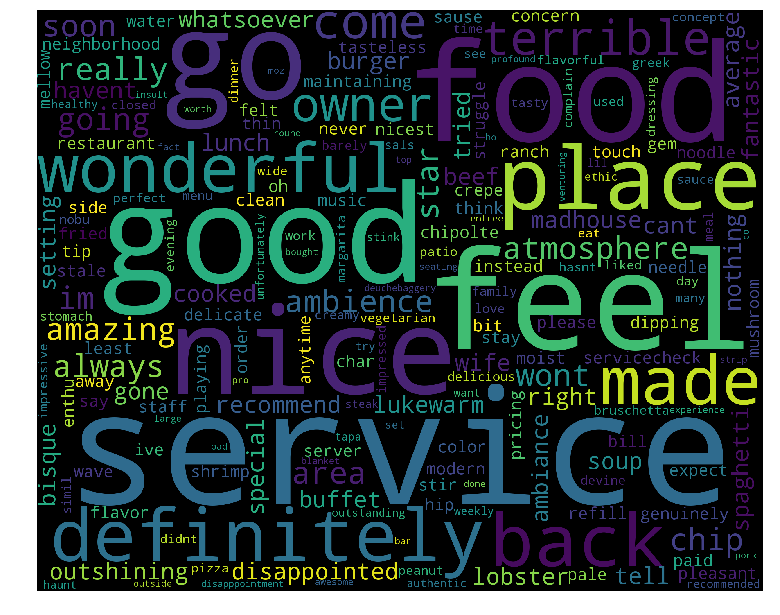

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

train_pos = yelp[ yelp['Value'] == 1]
train_neg = yelp[ yelp['Value'] == 0]


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(str(x_train['Sentence']))
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

Now, we skip to the ML Approach. We have to represent the document in a way that we can train models and obtain predictions.

### **1. Bag-Of-Words Representation**

We will consider each sentence as a set of independent words. 

1. We will form a vocabulary by extracting unique words used. These words will be the columns of our training data.
2. Every training sample will be represented by a row. For every sample, we will iterate through our vocabulary and count the occurences of each word.

So (i,j)^th entry in our data will correspond to the count of word j in i^th sample.





In [0]:
#Get the distinct words from the training data.
vocab = set()

for index, row in x_train.iterrows():
    vocab |= set(row.Sentence)

In [0]:
#How many words are there in the vocabulary
len(vocab)

1577

In [0]:
#Input: A DataFrame storing the sentences in its 'Sentence' column.
#Output: Bag of Words Representation of the data
#Compute the Bag of Words Representation
def ComputeBOW(data):
  bow = pd.DataFrame(data=None, index=None, columns=vocab, dtype=None, copy=False)
  
  for index, row in data.iterrows():
    counter = []
  
    for word in vocab:
      counter.append(row.Sentence.count(word))
    
    newrow = pd.Series(counter, index = list(vocab))

    bow = bow.append(newrow, ignore_index = True)
    
  return bow

In [0]:
#Compute the Bag of Words representation of the train data.
bow = ComputeBOW(x_train)

In [0]:
#Look at our data
bow.head()

,guy,crawfish,quick,behind,roasted,baklava,kept,reminds,drenched,later,...,gringo,watered,nyc,ever,jalapeno,stranger,tucson,shrimp,whenever,greasy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
import numpy as py
print("Unique values in our data: ", py.unique(bow))

Unique values in our data:  [0 1 2 3 4]


This means, the maximum number of words repeated in a single sample is 4.





### **2. TF-IDF Features**

**Term Frequency:** Number of occurences of term t in document d is defined as the number of times that t occurs in d. 

In the previous example, we saw that some terms occur once and some might occur 2, 3 or 4 times. If we use this representation, we would be treating like having more words and relevance of the result is direcly proportional. As if, having a word 2 times is 2 times relevant. To avoid this, we will check the Log Frequency of weight of the term. 

**Log Frequency Weight of a Term=** 
$1 + \log_{10}TermFrequency$ \\
If the TermFrequency is not 0, and 0 otherwise.

Moreover, rare words are more important. For example, we remove the stop words as they are extremely common. Inverse Document Frequency can capture this. IDF is the frequency of the number of documents a word occurs in. We will again take the logarithm.

**IDF= ** $\log_{10} (N \div TermFrequency)$ \\

To benefit from both approached, we use TF-IDF, which is the product of log frequency weight of a word and IDF.

**TF-IDF= ** $(1 + \log_{10}TermFrequency) \cdot  (\log_{10} (N \div TermFrequency))$ \\

We have the term\word frequencies computed in the Bag of Words approach, we can use it to calculate the TF-IDF feature.

In [0]:
import math

#Input: The Bag of Words Model
#Output: Log Frequency Weights of the BOW Model
#Takes the log of each row if they are >0
def LogFrequencies(DataFrame):
  new = pd.DataFrame(data=None, index=None, columns=vocab, dtype=float, copy=False)
  for index, row in DataFrame.iterrows():
    newrow = []
    for value in row:
      if int(value) != 0:
        newrow.append(float(1 + math.log10(float(value))))
      else: 
        newrow.append(0)
    newrow = pd.Series(newrow, index = list(vocab))
    new = new.append(newrow, ignore_index = True)
  
  return new

In [0]:
#Input: The Bag of Words Model
#Output: Inverse Document Frequencies
#Takes the log of each row if they are >0
def IDF(DataFrame):
  df = DataFrame.astype(bool).sum(axis=0) #document frequency
  numDocs = int(DataFrame.shape[1])
  idf = []
  for elt in df:
    if(elt != 0):
      idf.append(math.log10(numDocs/elt))
    else:
      idf.append(0)
  return idf

In [0]:
import numpy as py

#Input: Outputs of LogFrequencies and IDF functions
#Output: TFIDF feature
#Multiplies every row of LogFrequencies with IDF
def TFIDF(logF,idf):
  tfidf = pd.DataFrame(data=None, index=None, columns=vocab, dtype=None, copy=False)
  
  for index, row in logF.iterrows():
    newrow = py.multiply(row,idf)
    
    newrow = pd.Series(newrow, index = list(vocab))
    tfidf = tfidf.append(newrow, ignore_index = True)
  return tfidf

In [0]:
#Compute the TFI-DF Features
tfidf = TFIDF(LogFrequencies(bow),IDF(bow))

In [0]:
tfidf.head()


,guy,crawfish,quick,behind,roasted,baklava,kept,reminds,drenched,later,...,gringo,watered,nyc,ever,jalapeno,stranger,tucson,shrimp,whenever,greasy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **3. Word2Vec**

Word2vec is a two-layer neural network that processes text. It's input is the sentences we have, and it outputs a feature vector for each word in that sentence. These vectors are called neural word embeddings. The key characteristic of this approach is that similar words have similar feature vectors. The size of the feature vectors can be specified, and we use the default size, which is 100. The process of extracting the feature vectors can be parallelized by increasing the *workers* parameter. The similarity of the words are calculated using cosine similarity.

In [0]:
import gensim

In [0]:
yelpProcessed = yelp
myDataPreprocessing(yelpProcessed)
yelpProcessed.head()

,Sentence,Value,POStags
0,"[wow, loved, place]",1,"[(wow, NN), (loved, VBD), (place, NN)]"
1,"[crust, not, good]",0,"[(crust, NN), (not, RB), (good, JJ)]"
2,"[not, tasty, texture, nasty]",0,"[(not, RB), (tasty, JJ), (texture, NN), (nasty..."
3,"[stopped, late, may, bank, holiday, rick, stev...",1,"[(stopped, VBN), (late, JJ), (may, MD), (bank,..."
4,"[selection, menu, great, price]",1,"[(selection, NN), (menu, RB), (great, JJ), (pr..."


In [0]:
#build the model
#word_vectors store the neural word embedding for each word
model_w2v = gensim.models.Word2Vec(yelpProcessed['Sentence'], size=100, window=5, min_count=1, workers=4)
word_vectors = model_w2v.wv

In [0]:
#As an example, this is the neural word embedding of the word "good"
model_w2v.wv['good']

array([-3.0263052e-03, -2.8488752e-03,  2.1943231e-03, -3.5245493e-03,
       -7.9440523e-04,  2.0269721e-03, -2.7962876e-03,  1.7498040e-03,
       -4.1928589e-03, -2.1677501e-03,  5.1868926e-03,  2.1849887e-03,
       -5.2223857e-03,  5.0809719e-03, -2.3864220e-04, -2.0111424e-03,
       -2.7158624e-03,  4.5140479e-03,  1.9410213e-03,  4.9204370e-03,
        3.5740638e-03,  4.0959069e-03, -5.9047504e-03, -5.4074929e-04,
       -5.0674099e-04, -2.3614815e-03, -2.2158925e-03, -3.0302738e-03,
       -1.5639629e-03,  1.2013643e-03,  1.1885001e-03,  4.0356773e-03,
       -9.9607778e-04,  1.0842435e-03,  9.7032345e-04,  1.2189902e-03,
        4.1266289e-03,  2.6985998e-03,  1.3670499e-03,  4.3013804e-03,
       -1.7525246e-03, -2.1238923e-03, -1.5423050e-03, -2.9224982e-03,
        5.9721235e-04, -1.3068721e-03, -4.3255803e-03, -2.1488341e-03,
        9.3514437e-04,  8.4830576e-04,  1.4703488e-03, -4.6540946e-03,
        3.3513256e-03, -5.9092250e-03,  2.2585558e-04, -1.4537830e-04,
      

In [0]:
#Using this function, it finds similar words with input, here "good" is tried again.
model_w2v.wv.most_similar('good')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('three', 0.3918176293373108),
 ('heard', 0.3593512177467346),
 ('ambiance', 0.32404446601867676),
 ('lacked', 0.3113870620727539),
 ('going', 0.3026556968688965),
 ('time', 0.2805081307888031),
 ('even', 0.2743968367576599),
 ('believe', 0.27136531472206116),
 ('wire', 0.25672054290771484),
 ('han', 0.25457441806793213)]

In [0]:
model_w2v.wv.most_similar('food')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('great', 0.3888995051383972),
 ('pasta', 0.37868523597717285),
 ('didnt', 0.365462988615036),
 ('box', 0.356594979763031),
 ('everything', 0.34661436080932617),
 ('bought', 0.34213125705718994),
 ('first', 0.3342112898826599),
 ('want', 0.32754603028297424),
 ('long', 0.3248525559902191),
 ('not', 0.31879937648773193)]

In [0]:
model_w2v.wv.most_similar('bad')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('satisfying', 0.3460714817047119),
 ('sushi', 0.33325520157814026),
 ('lighter', 0.29934778809547424),
 ('glance', 0.2838454246520996),
 ('vacant', 0.2781592309474945),
 ('staff', 0.2619720995426178),
 ('take', 0.2619175910949707),
 ('shocked', 0.26053574681282043),
 ('black', 0.25974783301353455),
 ('chewy', 0.255837082862854)]

In [0]:
model_w2v.wv.most_similar('nice')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('not', 0.3463492691516876),
 ('quite', 0.3398207426071167),
 ('beer', 0.33885616064071655),
 ('steak', 0.3357958197593689),
 ('insulted', 0.3280287981033325),
 ('meal', 0.324515700340271),
 ('wall', 0.319437175989151),
 ('heimer', 0.30772408843040466),
 ('beensteppedinandtrackedeverywhere', 0.3025344908237457),
 ('everything', 0.30032652616500854)]

In [0]:
model_w2v.wv.similarity('bad','not')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.075013846

In [0]:
model_w2v.wv.similarity('not','good')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.25237927

In [0]:
#With this function, it finds the most similar words for the positive set, and most dissimilar words for the negative set.
model_w2v.wv.most_similar_cosmul(positive= ['good', 'best'],negative=['bad'])

[('ninja', 0.9192177653312683),
 ('rich', 0.9019197225570679),
 ('difference', 0.8317643404006958),
 ('dine', 0.8270399570465088),
 ('heard', 0.8254592418670654),
 ('chipolte', 0.8180621266365051),
 ('shoot', 0.8180445432662964),
 ('gooodd', 0.8056173920631409),
 ('disappoint', 0.8052562475204468),
 ('ala', 0.7984889149665833)]

In [0]:
#This function finds the word which is the outlier in the word string.
model_w2v.wv.doesnt_match("good best better bad".split())

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'best'

In [0]:
#We can also save the model
filename = "w2v.txt"
model_w2v.wv.save_word2vec_format(filename, binary = False)

## **Deep Learning**

Now, we can make predictions using the features that we have extracted. The first one is deep learning. In this part, we will form 3 networks using the Sequential model of Keras. The embedding layer will change in each case.

### 1. Using **Keras**

First, we will utilize the Embedding layer of Keras

In [0]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences


For the model to work, we need to tokenize every sentence. This means, each word will have a unique number assigned to it, and the sentence will be represented using those numbers instead of words. Moreover, the input has to be same length. This means, we would like to represent each sentence as if they had same number of words. To achieve this, we find the sentence having maximum length and pad the other sentences until they have this length.

In [0]:
yelpProcessed.head()

,Sentence,Value,POStags
0,"[wow, loved, place]",1,"[(wow, NN), (loved, VBD), (place, NN)]"
1,"[crust, not, good]",0,"[(crust, NN), (not, RB), (good, JJ)]"
2,"[not, tasty, texture, nasty]",0,"[(not, RB), (tasty, JJ), (texture, NN), (nasty..."
3,"[stopped, late, may, bank, holiday, rick, stev...",1,"[(stopped, VBN), (late, JJ), (may, MD), (bank,..."
4,"[selection, menu, great, price]",1,"[(selection, NN), (menu, RB), (great, JJ), (pr..."


In [0]:
yelp_processed_sentences = []
for row in yelpProcessed['Sentence']:
  str = ""
  for item in row:
    str += item + " "
  yelp_processed_sentences.append(str)

In [0]:
#Tokenize every sentence
tokenizer_obj = Tokenizer()
total_reviews = yelp['Sentence']
tokenizer_obj.fit_on_texts(total_reviews)

#myList = []
#for row in total_reviews:
#  str = ""
#  for item in row:
#    str += item + " "
#  myList.append(str)

#Find the maximum length of a sentence = max_length
#Vocab size = number of different words contained in the data
max_length = max([len(s.split()) for s in yelp_processed_sentences])
vocab_size = len(tokenizer_obj.word_index) +1

#Tokenize and pad train and test data seperately.
x_train_t = tokenizer_obj.texts_to_sequences(x_train['Sentence'])
x_valid_t = tokenizer_obj.texts_to_sequences(x_valid['Sentence'])

x_train_p = pad_sequences(x_train_t, maxlen = max_length, padding='post')
x_valid_p = pad_sequences(x_valid_t, maxlen = max_length, padding='post')



In [0]:
print("Max length of input sentence: ", max_length)
print("Number of words in vocabulary: ",vocab_size)

Max length of input sentence:  19
Number of words in vocabulary:  1813


Now, we will form the Sequential model. First layer will be the word embeddings. As an input, we put size of the vocabulary, size of feature vectors (100), and maximum input length (max_length). After this, we add a GRU layer, Gated Recurrent Unit, an improved version of standard recurrent neural network. Units, is the dimensionality of output space. And, we have a dense layer at the end. The actiavion function used is sigmiod as we are doing a binary classification.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

model_keras = Sequential()
model_keras.add(Embedding(vocab_size, 100, input_length = max_length))
model_keras.add(GRU(units=32, dropout= 0.2, recurrent_dropout = 0.2))
model_keras.add(Dense(1,activation= 'sigmoid'))



Using TensorFlow backend.


We configure the learning process with the compile method. The model will try to minimize the loss function. Binary Cross-Entropy is chosen as this is a binary classification. Cosine proximity is also tried.

In [0]:
model_keras.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])


The number of epochs, the number of times the network will update the weights, is set to 25 using empirical analysis. Batch is the number of samples in each gradient update and its default value is 25.

In [0]:
model_keras.fit(x_train_p,y_train,epochs=25, batch_size=32)


Epoch 1/25
800/800 [==============================] - 1s 2ms/step - loss: 0.6937 - acc: 0.4925
Epoch 2/25
800/800 [==============================] - 1s 707us/step - loss: 0.6941 - acc: 0.4938
Epoch 3/25
800/800 [==============================] - 1s 713us/step - loss: 0.6939 - acc: 0.5100
Epoch 4/25
800/800 [==============================] - 1s 712us/step - loss: 0.6926 - acc: 0.5175
Epoch 5/25
800/800 [==============================] - 1s 708us/step - loss: 0.6928 - acc: 0.5212
Epoch 6/25
800/800 [==============================] - 1s 725us/step - loss: 0.6846 - acc: 0.5975
Epoch 7/25
800/800 [==============================] - 1s 725us/step - loss: 0.4186 - acc: 0.8438
Epoch 8/25
800/800 [==============================] - 1s 715us/step - loss: 0.2120 - acc: 0.9337
Epoch 9/25
800/800 [==============================] - 1s 737us/step - loss: 0.1222 - acc: 0.9662
Epoch 10/25
800/800 [==============================] - 1s 775us/step - loss: 0.0902 - acc: 0.9800
Epoch 11/25
800/800 [==========

The predictions are in a float format, te closer it gets to 1 means there is a high probability that this is positive, and vice versa. They are converted to 0 and 1 based on their probability

In [0]:
pred_keras_1 = model_keras.predict(x_valid_p)

for i in range(len(pred_keras_1)):
  if pred_keras_1[i] >= 0.5:
    pred_keras_1[i] = 1
  else:
    pred_keras_1[i] = 0

  

The labels are also converted to an appropriate format.

In [0]:
import numpy as np
labels = np.zeros(len(y_valid))
for i in range(len(y_valid)):
  labels[i] = int(y_valid.values[i])

These are the results. The loss function did not make any impact on the result. 

In [0]:
from sklearn.metrics import f1_score
print("F1 score for the negative class  ", f1_score(labels, pred_keras_1,average=None)[0])


F1 score for the negative class   0.7889908256880734


### **2. Using Word2Vec**

In this part, instead of using Keras's Embedding layer, we will create our embedding layer using our word2vec model. We obtain it from the saved file, and rest is the same.

In [0]:
#Get feature vectors
f2 = open("w2v.txt",encoding="utf-8")
embeddings_index_2 = {}
for line in f2:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:])
  embeddings_index_2[word] = coefs
f2.close()

In [0]:
#Construct the embedding matrix
embedding_matrix_2 = py.zeros((vocab_size,100))

for word, i in tokenizer_obj.word_index.items():
  row = embeddings_index_2.get(word)
  if row is not None:
    embedding_matrix_2[i] = row
  

In [0]:
#Construct the model
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

embeddingLayer = Embedding(vocab_size,100,embeddings_initializer=keras.initializers.Constant(embedding_matrix_2), input_length = max_length, trainable = False)

model_nn_w2v = Sequential()
model_nn_w2v.add(embeddingLayer)
model_nn_w2v.add(GRU(units=32, dropout= 0.2, recurrent_dropout = 0.2))
model_nn_w2v.add(Dense(1,activation= 'sigmoid'))

In [0]:
model_nn_w2v.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model_nn_w2v.fit(x_train_p,y_train,epochs=50, batch_size=50)
preds_nn_w2v = model_nn_w2v.predict(x_valid_p)

Epoch 1/50
800/800 [==============================] - 1s 1ms/step - loss: 0.6932 - acc: 0.4825
Epoch 2/50
800/800 [==============================] - 0s 386us/step - loss: 0.6933 - acc: 0.5100
Epoch 3/50
800/800 [==============================] - 0s 366us/step - loss: 0.6931 - acc: 0.5100
Epoch 4/50
800/800 [==============================] - 0s 372us/step - loss: 0.6932 - acc: 0.5100
Epoch 5/50
800/800 [==============================] - 0s 370us/step - loss: 0.6931 - acc: 0.5100
Epoch 6/50
800/800 [==============================] - 0s 373us/step - loss: 0.6930 - acc: 0.5100
Epoch 7/50
800/800 [==============================] - 0s 361us/step - loss: 0.6930 - acc: 0.5100
Epoch 8/50
800/800 [==============================] - 0s 369us/step - loss: 0.6930 - acc: 0.5100
Epoch 9/50
800/800 [==============================] - 0s 371us/step - loss: 0.6929 - acc: 0.5100
Epoch 10/50
800/800 [==============================] - 0s 364us/step - loss: 0.6931 - acc: 0.5100
Epoch 11/50
800/800 [==========

In [0]:
#Form the labels from y_valid
labels = np.zeros(len(y_valid))
for i in range(len(y_valid)):
  labels[i] = int(y_valid.values[i])

In [0]:
for i in range(len(preds_nn_w2v)):
  if preds_nn_w2v[i] >= 0.5:
    preds_nn_w2v[i] = 1
  else:
    preds_nn_w2v[i] = 0

from sklearn.metrics import f1_score
print(" F1 score for the negative class: ",f1_score(labels, preds_nn_w2v, average=None)[0])

 F1 score for the negative class:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### **3. Using GloVe**

GloVe is also an algorithm to extract neural word embeddings. But it is pretrained. That is why we downloaded its pretrained 100 dimensional feature vectors and used it as the embedding layer. This might have better results than Word2Vec as it probably is trained with more data. As this is the best net, grid search was used to optimize the batch size and number of epochs.

In [0]:
#If this does not work, please download glove.6B.zip and add the 100d file https://nlp.stanford.edu/projects/glove/
#Get the neural word embeddings.
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = py.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()


In [0]:
print("Number of words in GloVe vocabulary: ", len(embeddings_index))

Number of words in GloVe vocabulary:  84222


In [0]:
#Form the embedding matrix
embedding_matrix = py.zeros((107331, 100))
for word, i in tokenizer_obj.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [0]:
def create_model():
  model_glove2 = Sequential()
  e = Embedding(107331, 100, weights=[embedding_matrix], input_length=19, trainable=False)
  model_glove2.add(e)
  model_glove2.add(GRU(units=32, dropout= 0.2, recurrent_dropout = 0.2))
  model_glove2.add(Dense(1, activation='sigmoid'))
  model_glove2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  return model_glove2

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [0]:
#This takes very long due to Grid Search
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

model_glove2 = KerasClassifier(build_fn=create_model, verbose=0)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model_glove2, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(x_train_p, y_train)
report(grid_result.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Model with rank: 1
Mean validation score: 0.834 (std: 0.017)
Parameters: {'batch_size': 100, 'epochs': 100}

Model with rank: 2
Mean validation score: 0.833 (std: 0.017)
Parameters: {'batch_size': 80, 'epochs': 100}

Model with rank: 3
Mean validation score: 0.831 (std: 0.008)
Parameters: {'batch_size': 20, 'epochs': 100}



In [0]:
from keras.layers import Dense
from keras.layers import Flatten

#form the model
model_glove = Sequential()
e = Embedding(107331, 100, weights=[embedding_matrix], input_length=19, trainable=False)
model_glove.add(e)
model_glove.add(GRU(units=32, dropout= 0.2, recurrent_dropout = 0.2))
model_glove.add(Dense(1, activation='sigmoid'))
# compile the model
model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model_glove.summary())
# fit the model
model_glove.fit(x_train_p,y_train,epochs=50, batch_size=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 19, 100)           10733100  
_________________________________________________________________
gru_4 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 10,745,901
Trainable params: 12,801
Non-trainable params: 10,733,100
_________________________________________________________________
None
Epoch 1/50
800/800 [==============================] - 2s 2ms/step - loss: 0.6940 - acc: 0.4712
Epoch 2/50
800/800 [==============================] - 1s 637us/step - loss: 0.6914 - acc: 0.5325
Epoch 3/50
800/800 [==============================] - 1s 663us/step - loss: 0.6876 - acc: 0.5662
Epoch 4/50
800/800 [==============================] - 1s 669us/step - loss: 0.6264 - acc: 0.686

In [0]:
#Predict
preds = model_glove.predict(x_valid_p)

for i in range(len(preds)):
  if preds[i] >= 0.5:
    preds[i] = 1
  else:
    preds[i] = 0

  

In [0]:
#Form the labels from y_valid
labels = np.zeros(len(y_valid))
for i in range(len(y_valid)):
  labels[i] = int(y_valid.values[i])

In [0]:
#Analyse
from sklearn.metrics import f1_score
print("F1 score for the negative class ", f1_score(labels, preds,average=None)[0])


F1 score for the negative class  0.8224299065420562


## **Multinomial Naive Bayes**

We will not use neural word embeddings with Naive Bayes as it does not allow negative values as an input. 

### **1. Naive Bayes using Bag of Words**

In [0]:
#Train the Multinomial Naive Bayes Classifier with Bag of Words Features
from sklearn.naive_bayes import MultinomialNB
clfnb = MultinomialNB().fit(bow, y_train.values)

In [0]:
#Prepare the test data for prediction by putting it into Bag of Words Format
myDataPreprocessing(x_valid)
bow_test = ComputeBOW(x_valid)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#Predict
predicted = clfnb.predict(bow_test)

In [0]:
from sklearn.metrics import f1_score
print("F1 score for the negative class ", f1_score(labels, preds,average=None)[0])

F1 score for the negative class  0.8224299065420562


### **2. Naive Bayes using TFIDF**

In [0]:
#Train the Multinomial Naive Bayes Classifier with TFIDF features
from sklearn.naive_bayes import MultinomialNB
clf2 = MultinomialNB().fit(tfidf, y_train.values)

In [0]:
  #Prepare the test data for prediction by extracting its TFIDF features
tfidf_test = TFIDF(LogFrequencies(bow_test),IDF(bow_test))

In [0]:
#Predict
predicted2 = clf2.predict(tfidf_test)

In [0]:
#Analyse
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
print( "F1 score for the negative class: ",f1_score(y_valid, predicted2, average=None)[0])
print("Confusion Matrix: ",confusion_matrix(y_valid, predicted2))

F1 score for the negative class:  0.7751196172248804
Confusion Matrix:  [[81 27]
 [20 72]]


## **Support Vector Machine**

The goal of SVM is to maximize the margin between classes. The main idea behind this is to map the data into a higher dimension. Thanks to the kernels it use, the data does not need to be direcly mapped to a higher dimension but the same outcome can be obtained without mapping. Word2Vec and GloVe also maps the words into high dimensions. That is why TFIDF is used as a feature rather than neural word embeddings. Also, Randomized Grid Search is used to optimize the hyperparameters.

In [0]:
#The execution takes long due to randomized search
import scipy
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
import sklearn
clf3 = svm.SVC()
param_dist = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),
  'kernel': ['rbf'], 'class_weight':['balanced', None]}
rand_search = RandomizedSearchCV(clf3, param_distributions=param_dist,n_iter=20, cv=5)
rand_search.fit(tfidf, y_train.values)
report(rand_search.cv_results_)


Model with rank: 1
Mean validation score: 0.815 (std: 0.045)
Parameters: {'C': 23.407536652210233, 'class_weight': None, 'gamma': 0.003811492146633252, 'kernel': 'rbf'}

Model with rank: 2
Mean validation score: 0.791 (std: 0.029)
Parameters: {'C': 1.031715481384184, 'class_weight': 'balanced', 'gamma': 0.02003811371148494, 'kernel': 'rbf'}

Model with rank: 3
Mean validation score: 0.775 (std: 0.037)
Parameters: {'C': 200.06036928943223, 'class_weight': 'balanced', 'gamma': 0.025216017848971334, 'kernel': 'rbf'}



In [0]:
from sklearn import svm
clf3 = svm.SVC(C=13.88933423371426, class_weight=None, gamma=0.015967055411381006).fit(tfidf, y_train.values)
predicted3 = clf3.predict(tfidf_test)
print("F1 score for the negative class: ",f1_score(y_valid, predicted3,average=None)[0])
print("Confusion Matrix: ",confusion_matrix(y_valid, predicted3))


F1 score for the negative class:  0.8075117370892019
Confusion Matrix:  [[86 22]
 [19 73]]


# N-Gram

N-grams are simply all combinations of adjacent words or letters of length n that can be found in source text. Here, aim is to group the review sentences and see if there are any related words that may affect polarity of the review.

In [0]:
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
from nltk.classify import NaiveBayesClassifier

In [0]:
#Train data is split into sentences and their corresponding labels

x = yelp['Sentence']
y = yelp['Value']

In [0]:
#Function for creating n-grams. 
#This function is different from Natural Language Toolkit function ngrams() in terms of returning value.
#It returns dictionary for n-grams to be used for Naive Bayes Classifier.

def ngram(words, n):
    ngram_vocab = ngrams(words, n)
    my_dict = dict([(ng, True) for ng in ngram_vocab])
    return my_dict

------------------------------------------

**Applying Naive Bayes**


---



In [0]:
#1-gram with Naive Bayes Classifier
data = []
counter = 0
for sentt in x:
  words = sentt
  if y.loc[counter] == '1':
    data.append((ngram(words,1), "positive")) 
  if y.loc[counter] == '0':
    data.append((ngram(words,1), "negative"))   
  counter = counter +1
    
train_set = data[:800]
test_set =  data[800:]
classifier1 = nltk.NaiveBayesClassifier.train(train_set)
accuracy = nltk.classify.util.accuracy(classifier1, test_set)
print("Accuracy: ",accuracy)

Accuracy:  0.795


In [0]:
classifier1.show_most_informative_features(32)


Most Informative Features
            ('amazing',) = True           positi : negati =     10.0 : 1.0
              ('worst',) = True           negati : positi =      8.2 : 1.0
               ('dont',) = True           negati : positi =      6.9 : 1.0
           ('friendly',) = True           positi : negati =      6.6 : 1.0
            ('another',) = True           negati : positi =      6.5 : 1.0
               ('love',) = True           positi : negati =      6.4 : 1.0
               ('menu',) = True           positi : negati =      6.4 : 1.0
               ('nice',) = True           positi : negati =      6.0 : 1.0
             ('eating',) = True           negati : positi =      5.6 : 1.0
              ('never',) = True           negati : positi =      5.6 : 1.0
         ('atmosphere',) = True           positi : negati =      5.4 : 1.0
              ('think',) = True           negati : positi =      4.9 : 1.0
               ('cold',) = True           negati : positi =      4.8 : 1.0

In [0]:
#2-gram with Naive Bayes Classifier
data2 = []
counter2 = 0
for sentt2 in x:
  words2 = sentt2
  if y.loc[counter2] == '1':
    data2.append((ngram(words2,2), 1)) 
  if y.loc[counter2] == '0':
    data2.append((ngram(words2,2), 0))   
  counter2 = counter2 +1
    
train_set2 = data2[:800]
test_set2 =  data2[800:]
classifier2 = NaiveBayesClassifier.train(train_set2)
accuracy2 = nltk.classify.util.accuracy(classifier2, test_set2)
print("Accuracy: ",accuracy2)

Accuracy:  0.45


In [0]:
#3-gram with Naive Bayes Classifier
data3 = []
counter3 = 0
for sentt3 in x:
  words3 = sentt3
  if y.loc[counter3] == '1':
    data3.append((ngram(words3,3), "positive")) 
  if y.loc[counter3] == '0':
    data3.append((ngram(words3,3), "negative"))   
  counter3 = counter3 +1
    
train_set3 = data3[:800]
test_set3 =  data3[800:]
classifier3 = NaiveBayesClassifier.train(train_set3)
accuracy3 = nltk.classify.util.accuracy(classifier3, test_set3)
print("Accuracy: ",accuracy3)

Accuracy:  0.28


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'ngrams' raised StopIteration
  after removing the cwd from sys.path.


In [0]:
#4-gram with Naive Bayes Classifier
data4 = []
counter4 = 0
for sentt4 in x:
  words4 = sentt4
  if y.loc[counter4] == '1':
    data4.append((ngram(words4,4), "positive")) 
  if y.loc[counter4] == '0':
    data4.append((ngram(words4,4), "negative"))   
  counter4 = counter4 +1
    
train_set4 = data4[:800]
test_set4 =  data4[800:]
classifier4 = NaiveBayesClassifier.train(train_set4)
accuracy4 = nltk.classify.util.accuracy(classifier4, test_set4)
print("Accuracy: ",accuracy4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'ngrams' raised StopIteration
  after removing the cwd from sys.path.


Accuracy:  0.255


In [0]:
#5-gram with Naive Bayes Classifier
data5 = []
counter5 = 0
for sentt5 in x:
  words5 = sentt5
  if y.loc[counter5] == '1':
    data5.append((ngram(words5,5), "positive")) 
  if y.loc[counter5] == '0':
    data5.append((ngram(words5,5), "negative"))   
  counter5 = counter5 +1
    
train_set5 = data5[:800]
test_set5 =  data5[800:]
classifier5 = NaiveBayesClassifier.train(train_set5)
accuracy5 = nltk.classify.util.accuracy(classifier5, test_set5)
print("Accuracy: ",accuracy5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'ngrams' raised StopIteration
  after removing the cwd from sys.path.


Accuracy:  0.245


Since our dataset is very small, best result is obtained from 1-gram.

# Phrase Modelling 

Another thing that can be implemented with Gensim library is phrase detection. It is similar to n-gram, but instead of getting all the n-gram by sliding the window, it detects frequently-used phrases and sticks them together. 

In [0]:
yelp.head()

,Sentence,Value,POStags
0,"[wow, loved, place]",1,"[(wow, NN), (loved, VBD), (place, NN)]"
1,"[crust, not, good]",0,"[(crust, NN), (not, RB), (good, JJ)]"
2,"[not, tasty, texture, nasty]",0,"[(not, RB), (tasty, JJ), (texture, NN), (nasty..."
3,"[stopped, late, may, bank, holiday, rick, stev...",1,"[(stopped, VBN), (late, JJ), (may, MD), (bank,..."
4,"[selection, menu, great, price]",1,"[(selection, NN), (menu, RB), (great, JJ), (pr..."


In [0]:
#Train data is split into sentences and their corresponding labels

x = yelp['Sentence']
y = yelp['Value']

In [0]:
#Preprocessed sentences are converted to strings and inserted to a dataframe for tokenization.

yelpDF = pd.DataFrame(data=None, index=None, columns=['Sentence']) 

for i in x:
  new_string=""
 
  for word in i:
    new_string+=(word+" ")
  row = pd.Series(new_string, index=['Sentence'])
  yelpDF = yelpDF.append(row, ignore_index = True)


In [0]:
X = yelpDF

In [0]:
X.head()

,Sentence
0,wow loved place
1,crust not good
2,not tasty texture nasty
3,stopped late may bank holiday rick steve recom...
4,selection menu great price


In [0]:
x_train1, x_validation1, y_train1, y_validation1 = train_test_split(X['Sentence'], y, test_size=0.2)

## Creating Bigram and Trigram

In [0]:
#Importing Gensim Libraries
import gensim.models.phrases
from gensim.models.phrases import Phrases
from gensim.models.phrases import Phraser
from gensim.models import  word2vec

In [0]:
#Sentences are splitted for tokenization
tokenized_train = [t.split() for t in x_train1]

In [0]:
max_l = max([len(s.split()) for s in X['Sentence']])
vocab_size1 = len(tokenizer_obj.word_index) +1

#Tokenize and pad train and test data seperately.
x_trainT = tokenizer_obj.texts_to_sequences(x_train1)
x_validT = tokenizer_obj.texts_to_sequences(x_validation1)

x_trainP = pad_sequences(x_trainT, maxlen = max_l, padding='post')
x_validP = pad_sequences(x_validT, maxlen = max_l, padding='post')

In [0]:
#Creating bigrams and trigram using Phrases and Phraser from Gensim
phrases = Phrases(tokenized_train) 
bigram = Phraser(phrases)
trigram = Phrases(bigram[tokenized_train])



---





---

### Word2vec

In [0]:
#Word2vec is trained with bigram
bigram[tokenized_train]
modelB = word2vec.Word2Vec(bigram[tokenized_train], size=100, min_count=10, iter=20)

In [0]:
modelB.wv.most_similar('good')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('time', 0.8893240690231323),
 ('place', 0.8855106830596924),
 ('not', 0.8763890862464905),
 ('food', 0.8541725277900696),
 ('would', 0.8473613262176514),
 ('taste', 0.8440192937850952),
 ('burger', 0.835328221321106),
 ('even', 0.8307396173477173),
 ('salad', 0.8299721479415894),
 ('service', 0.8297655582427979)]

In [0]:
modelB.wv.most_similar('not')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('time', 0.9361487030982971),
 ('place', 0.9264581203460693),
 ('food', 0.9132956266403198),
 ('service', 0.8977912664413452),
 ('back', 0.8926221132278442),
 ('burger', 0.890794575214386),
 ('would', 0.8847935199737549),
 ('good', 0.8763890862464905),
 ('taste', 0.8740497827529907),
 ('well', 0.8632289171218872)]

In [0]:
modelB.wv.most_similar('bad')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sushi', 0.7534147500991821),
 ('time', 0.73964524269104),
 ('place', 0.7338544130325317),
 ('well', 0.7300328612327576),
 ('food', 0.72318434715271),
 ('not', 0.7206611633300781),
 ('back', 0.71816086769104),
 ('wait', 0.711316704750061),
 ('taste', 0.7084965109825134),
 ('ever', 0.705784022808075)]

In [0]:
#save the model
filename = "w2vBigram.txt"
modelB.wv.save_word2vec_format(filename, binary = False)

In [0]:
#Get feature vectors
fileB = open("w2vBigram.txt",encoding="utf-8")
embeddings_index_B = {}
for lineb in fileB:
  valuesB = lineb.split()
  wordB = valuesB[0]
  coefsB = np.asarray(valuesB[1:])
  embeddings_index_B[wordB] = coefsB
fileB.close()

In [0]:
#Construct the embedding matrix
embedding_matrix_B = py.zeros((vocab_size,100))

for word, i in tokenizer_obj.word_index.items():
  row = embeddings_index_B.get(word)
  if row is not None:
    embedding_matrix_B[i] = row
  

In [0]:
#Construct the model
embeddingLayerB = Embedding(vocab_size,100,embeddings_initializer=keras.initializers.Constant(embedding_matrix_B), input_length = max_length, trainable = False)

model_B_w2v = Sequential()
model_B_w2v.add(embeddingLayerB)
model_B_w2v.add(GRU(units=32, dropout= 0.2, recurrent_dropout = 0.2))
model_B_w2v.add(Dense(1,activation= 'sigmoid'))

model_B_w2v.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model_B_w2v.fit(x_trainP,y_train1,epochs=50, batch_size=50)
preds_B_w2v = model_B_w2v.predict(x_validP)

Epoch 1/50
800/800 [==============================] - 2s 2ms/step - loss: 0.6934 - acc: 0.5000
Epoch 2/50
800/800 [==============================] - 0s 368us/step - loss: 0.6933 - acc: 0.4775
Epoch 3/50
800/800 [==============================] - 0s 375us/step - loss: 0.6932 - acc: 0.4900
Epoch 4/50
800/800 [==============================] - 0s 371us/step - loss: 0.6933 - acc: 0.5013
Epoch 5/50
800/800 [==============================] - 0s 372us/step - loss: 0.6934 - acc: 0.4725
Epoch 6/50
800/800 [==============================] - 0s 366us/step - loss: 0.6933 - acc: 0.4987
Epoch 7/50
800/800 [==============================] - 0s 362us/step - loss: 0.6932 - acc: 0.5012
Epoch 8/50
800/800 [==============================] - 0s 362us/step - loss: 0.6932 - acc: 0.5012
Epoch 9/50
800/800 [==============================] - 0s 386us/step - loss: 0.6932 - acc: 0.4888
Epoch 10/50
800/800 [==============================] - 0s 358us/step - loss: 0.6932 - acc: 0.4788
Epoch 11/50
800/800 [==========

In [0]:
#Form the labels from y_valid
labels1 = np.zeros(len(y_validation1))
for i in range(len(y_validation1)):
  labels1[i] = int(y_validation1.values[i])

In [0]:
for i in range(len(preds_B_w2v)):
  if preds_B_w2v[i] >= 0.5:
    preds_B_w2v[i] = 1
  else:
    preds_B_w2v[i] = 0

from sklearn.metrics import f1_score
print("F1 score for the negative class: ",f1_score(labels1, preds_B_w2v, average=None)[0])

F1 score for the negative class:  0.4246575342465753




---



In [0]:
#Word2vec is trained with trigram
modelT = word2vec.Word2Vec(trigram[tokenized_train], size=100, min_count=10, iter=20)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [0]:
modelT.wv.most_similar('good')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('time', 0.8893240690231323),
 ('place', 0.8855106830596924),
 ('not', 0.8763890862464905),
 ('food', 0.8541725277900696),
 ('would', 0.8473613262176514),
 ('taste', 0.8440192937850952),
 ('burger', 0.835328221321106),
 ('even', 0.8307396173477173),
 ('salad', 0.8299721479415894),
 ('service', 0.8297655582427979)]

In [0]:
#save the model
filename = "w2vTrigram.txt"
modelT.wv.save_word2vec_format(filename, binary = False)

In [0]:
#Get feature vectors
fileT = open("w2vTrigram.txt",encoding="utf-8")
embeddings_index_T = {}
for linet in fileT:
  valuesT = linet.split()
  wordT = valuesT[0]
  coefsT = np.asarray(valuesT[1:])
  embeddings_index_T[wordT] = coefsT
fileT.close()

In [0]:
#Construct the embedding matrix
embedding_matrix_T = py.zeros((vocab_size,100))

for word, i in tokenizer_obj.word_index.items():
  row = embeddings_index_T.get(word)
  if row is not None:
    embedding_matrix_T[i] = row
  

In [0]:
#Construct the model
embeddingLayerT = Embedding(vocab_size,100,embeddings_initializer=keras.initializers.Constant(embedding_matrix_T), input_length = max_length, trainable = False)

model_T_w2v = Sequential()
model_T_w2v.add(embeddingLayerT)
model_T_w2v.add(GRU(units=32, dropout= 0.2, recurrent_dropout = 0.2))
model_T_w2v.add(Dense(1,activation= 'sigmoid'))

model_T_w2v.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model_T_w2v.fit(x_trainP,y_train1,epochs=50, batch_size=50)
preds_T_w2v = model_T_w2v.predict(x_validP)

Epoch 1/50
800/800 [==============================] - 2s 2ms/step - loss: 0.6934 - acc: 0.4800
Epoch 2/50
800/800 [==============================] - 0s 351us/step - loss: 0.6933 - acc: 0.4688
Epoch 3/50
800/800 [==============================] - 0s 367us/step - loss: 0.6933 - acc: 0.4950
Epoch 4/50
800/800 [==============================] - 0s 388us/step - loss: 0.6932 - acc: 0.5012
Epoch 5/50
800/800 [==============================] - 0s 372us/step - loss: 0.6932 - acc: 0.4837
Epoch 6/50
800/800 [==============================] - 0s 355us/step - loss: 0.6932 - acc: 0.4587
Epoch 7/50
800/800 [==============================] - 0s 360us/step - loss: 0.6932 - acc: 0.4987
Epoch 8/50
800/800 [==============================] - 0s 363us/step - loss: 0.6932 - acc: 0.4937
Epoch 9/50
800/800 [==============================] - 0s 368us/step - loss: 0.6932 - acc: 0.5012
Epoch 10/50
800/800 [==============================] - 0s 365us/step - loss: 0.6931 - acc: 0.5013
Epoch 11/50
800/800 [==========

In [0]:
#Form the labels from y_valid
labels2 = np.zeros(len(y_validation1))
for i in range(len(y_validation1)):
  labels2[i] = int(y_validation1.values[i])

In [0]:
for i in range(len(preds_T_w2v)):
  if preds_T_w2v[i] >= 0.5:
    preds_T_w2v[i] = 1
  else:
    preds_T_w2v[i] = 0

from sklearn.metrics import f1_score
print("F1 score for the negative class: ",f1_score(labels2, preds_T_w2v, average=None)[0])

F1 score for the negative class:  0.47727272727272724


# **Ensemble**

We formed an ensemble using our best models to prevent overfitting and increase accuracy.



1.   Bigram Word2Vec: *preds_B_w2v*
2.   SVM Using DTFIF Features: *predicted3*
3.   Trigam Word2Vec: *preds_T_w2v*
4.   Naive Bayes with Bag Words Features: *predicted*
5.   Lexicographic Approach: *preds_lex*
6.   Using Glove Features with Neural Net:*preds*
7.   Using Keras's Embedding Layer:*preds_keras_1*










In [0]:
import statistics as st
final_result = []

#svm, nb bow, lex, glove, keras
for i in range (0,200):
  row = [int(preds_B_w2v[i]), int(predicted3[i]),int(preds_T_w2v[i]),int(predicted[i]), int(preds_lex[i]), int(preds[i,0]), int(pred_keras_1[i,0])];
  final_result.append(st.mode(row))

In [0]:
y_valid_2 = list(map(int, y_valid.values))

In [0]:
print("F1 score for the negative class: ",f1_score(y_valid_2, final_result,average=None)[0])

F1 score for the negative class:  0.815165876777251


# ** Final Test**

We will retrain the models used in our ensemble again including the validation data too, before the final test. The test_data will be read and prepared..

**1. Read and prepare the test data**

In [0]:
#Get the test file within Colab. Please upload the test file with the same name to the Files section on the left hand side.
import pandas as pd
TEST_DATA = pd.read_excel('yelp-test.xlsx',index_col=None, header=None,dtype={'0':str, '1':str})
TEST_DATA = TEST_DATA.rename(columns={0: "Sentence", 1: "Value"})

In [0]:
#Head of Test data
TEST_DATA.head()

,Sentence,Value
0,YUM! I've been craving real asian noodles and ...,1
1,You may easily miss this hole in the wall but ...,1
2,"You can't visit Boston without eating one, two...",1
3,"With my purest sincerity, I cannot recommend t...",0


In [0]:
#Also divide the test data
TEST_DATA_X = TEST_DATA.drop(['Value'],axis=1)
TEST_DATA_Y = TEST_DATA['Value']

In [0]:
#Apply Preprocessing to Test Data
myDataPreprocessing(TEST_DATA_X)

**2. Extract Bag of Words Features**

In [0]:
bowtest = ComputeBOW(TEST_DATA_X)

**3. Extract TFIDF Features**

In [0]:
tfidftest = TFIDF(LogFrequencies(bowtest),IDF(bowtest))

**4. Train the Moltinomial Naive Bayes with BOW**

In [0]:
predicted_nb = clfnb.predict(bowtest)

In [0]:
predicted_nb_int = []
for i in range(len(predicted_nb)):
  predicted_nb_int.append(int(predicted_nb[i]))

In [0]:
from sklearn.metrics import f1_score
print("F1 score for the negative class: ", f1_score(TEST_DATA_Y.values, predicted_nb_int,average=None)[0])


F1 score for the negative class:  0.0


**5. Train SVM with TFIDF**

In [0]:
from sklearn.metrics import f1_score


predicted_svc = clf3.predict(tfidftest)

predicted_svc_int = []
for i in range(len(predicted_svc)):
  predicted_svc_int.append(int(predicted_svc[i]))

print("F1 score for the negative class: ",f1_score(TEST_DATA_Y.values, predicted_svc_int,average=None)[0])
print("Confusion Matrix: ",confusion_matrix(TEST_DATA_Y.values, predicted_svc_int))

F1 score for the negative class:  0.0
Confusion Matrix:  [[0 1]
 [3 0]]


 **7. Train the Network using Keras's Embedding Layer**

In [0]:
all_sentences = pd.concat([TEST_DATA_X['Sentence'],yelpProcessed['Sentence']], axis=0)

In [0]:
all_processed_sentences = []
for row in all_sentences:
  str = ""
  for item in row:
    str += item + " "
  all_processed_sentences.append(str)

In [0]:
#Tokenize every sentence
tokenizer_obj = Tokenizer()
total_reviews = all_sentences
tokenizer_obj.fit_on_texts(total_reviews)


#Find the maximum length of a sentence = max_length
#Vocab size = number of different words contained in the data
max_length = max([len(s.split()) for s in all_processed_sentences])
vocab_size = len(tokenizer_obj.word_index) +1

#Tokenize and pad train and test data seperately.
x_train_t = tokenizer_obj.texts_to_sequences(x_train['Sentence'])
x_test_t = tokenizer_obj.texts_to_sequences(TEST_DATA_X['Sentence'])

x_train_p = pad_sequences(x_train_t, maxlen = max_length, padding='post')
x_test_p = pad_sequences(x_test_t, maxlen = max_length, padding='post')



In [0]:
print("Max length of input sentence: ", max_length)
print("Number of words in vocabulary: ",vocab_size)

Max length of input sentence:  20
Number of words in vocabulary:  1826


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

model_keras_t = Sequential()
model_keras_t.add(Embedding(vocab_size, 100, input_length = max_length))
model_keras_t.add(GRU(units=32, dropout= 0.2, recurrent_dropout = 0.2))
model_keras_t.add(Dense(1,activation= 'sigmoid'))



In [0]:
model_keras_t.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [0]:
model_keras_t.fit(x_train_p,y_train,epochs=25, batch_size=32)


Epoch 1/25
800/800 [==============================] - 2s 3ms/step - loss: 0.6954 - acc: 0.4875
Epoch 2/25
800/800 [==============================] - 1s 769us/step - loss: 0.6930 - acc: 0.5012
Epoch 3/25
800/800 [==============================] - 1s 775us/step - loss: 0.6941 - acc: 0.5075
Epoch 4/25
800/800 [==============================] - 1s 776us/step - loss: 0.6934 - acc: 0.5100
Epoch 5/25
800/800 [==============================] - 1s 798us/step - loss: 0.6941 - acc: 0.5125
Epoch 6/25
800/800 [==============================] - 1s 775us/step - loss: 0.6923 - acc: 0.5025
Epoch 7/25
800/800 [==============================] - 1s 755us/step - loss: 0.6337 - acc: 0.6325
Epoch 8/25
800/800 [==============================] - 1s 779us/step - loss: 0.2930 - acc: 0.9012
Epoch 9/25
800/800 [==============================] - 1s 776us/step - loss: 0.1757 - acc: 0.9413
Epoch 10/25
800/800 [==============================] - 1s 783us/step - loss: 0.1073 - acc: 0.9763
Epoch 11/25
800/800 [==========

In [0]:
pred_keras_t1 = model_keras_t.predict(x_test_p)

for i in range(len(pred_keras_t1)):
  if pred_keras_t1[i] >= 0.5:
    pred_keras_t1[i] = 1
  else:
    pred_keras_t1[i] = 0

  

In [0]:
from sklearn.metrics import f1_score
print("F1 score for the negative class: ", f1_score(TEST_DATA_Y, pred_keras_t1,average=None)[0])


F1 score for the negative class:  0.0


**8.Glove**

In [0]:
#If this does not work, please download glove.6B.zip and add the 100d file https://nlp.stanford.edu/projects/glove/
#Get the neural word embeddings.
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = py.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()


In [0]:
#Form the embedding matrix
embedding_matrix = py.zeros((107331, 100))
for word, i in tokenizer_obj.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [0]:
def create_model():
  model_glove2 = Sequential()
  e = Embedding(107331, 100, weights=[embedding_matrix], input_length=max_length, trainable=False)
  model_glove2.add(e)
  model_glove2.add(GRU(units=32, dropout= 0.2, recurrent_dropout = 0.2))
  model_glove2.add(Dense(1, activation='sigmoid'))
  model_glove2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  return model_glove2

In [0]:
from keras.layers import Dense
from keras.layers import Flatten

#form the model
model_glove = Sequential()
e = Embedding(107331, 100, weights=[embedding_matrix], input_length=max_length, trainable=False)
model_glove.add(e)
model_glove.add(GRU(units=32, dropout= 0.2, recurrent_dropout = 0.2))
model_glove.add(Dense(1, activation='sigmoid'))
# compile the model
model_glove.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
print(model_glove.summary())
# fit the model
model_glove.fit(x_train_p,y_train,epochs=50, batch_size=20)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 20, 100)           10733100  
_________________________________________________________________
gru_8 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 10,745,901
Trainable params: 12,801
Non-trainable params: 10,733,100
_________________________________________________________________
None
Epoch 1/50
800/800 [==============================] - 2s 3ms/step - loss: 0.6939 - acc: 0.5025
Epoch 2/50
800/800 [==============================] - 1s 691us/step - loss: 0.6933 - acc: 0.5138
Epoch 3/50
800/800 [==============================] - 1s 714us/step - loss: 0.6913 - acc: 0.5538
Epoch 4/50
800/800 [==============================] - 1s 710us/step - loss: 0.6446 - acc: 0.633

In [0]:
#Predict
preds_glv = model_glove.predict(x_test_p)

for i in range(len(preds_glv)):
  if preds_glv[i] >= 0.5:
    preds_glv[i] = 1
  else:
    preds_glv[i] = 0

  

In [0]:
#Analyse
from sklearn.metrics import f1_score
print("F1 score for the negative class: ", f1_score(TEST_DATA_Y, preds_glv,average=None)[0])


F1 score for the negative class:  0.4


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**9. Predict with Lexicon Based Approach**

In [0]:
preds_lex = []
for row in TEST_DATA['Sentence']:
    preds = swn_polarity(row)
    preds_lex.append(preds)

**12. Form the Ensemle adding abovementioned models**

In [0]:
import statistics as st
final_result = []

#svm, nb bow, lex, glove, keras, bigram with word2vec, trigram with word2vec
for i in range (0,len(TEST_DATA_Y)):
  row = [int(predicted_nb_int[i]), int(predicted_svc_int[i]), int(preds_lex[i]), int(preds_glv[i,0]), int(pred_keras_t1[i,0])];
  print(row)
  final_result.append(st.mode(row))

In [0]:
print("F1 score for the negative class: " ,f1_score(TEST_DATA_Y, final_result,average=None)[0])

F1 score for the negative class:  0.0


# **Conclusion**

Sentiment analysis is a process of automatically identifying whether a user-generated text expresses positive, negative or neutral opinion about an entity (i.e. product, people, topic, event etc).Sentiment classification can be done at Document level, Sentence level and Aspect or Feature level. In Document level the whole document is used as a basic information unit to classify it either into positive or negative class. Sentence level sentiment classification classifies each sentence first as subjective or objective and then classifies into positive, negative or neutral class. There is no much difference between the above two methods as sentence is just a short document. Aspect or Feature level sentiment classification deals with identifying and extracting product features from the source data.

After doing a lexicon based approach, we have done feature extraction and used several ML algorithms. The maximum F1 score that we have got in our train data was 0.82 with Naive Bayes using Bag of words. Also our ensemble gave 0.82 score. SVM gave us a good F1 score for negative class, as well. The test scores are significantly lower than the train scores, since the test set is sort of trivial. 

The lower scores that we have obtained were due to the size and the shape of our datasets. Further improvements can be observed via rule-based approaches.  


### **Resources**

https://machinelearningmastery.com/develop-word-embedding-model-predicting-movie-review-sentiment/

https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456

https://nlp.stanford.edu/projects/glove/

https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

https://radimrehurek.com/gensim/models/word2vec.html

https://nlpforhackers.io/sentiment-analysis-intro/

https://ieeexplore.ieee.org/document/7912076